# Importação das bibliotecas e módulos do Python

In [1]:
# importing dask library
import pandas as pd
import numpy as np
import dask.dataframe as dd
import glob as glob
import warnings
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt
import seaborn as sb

# Importação do Conjunto de Dados: GFS25

In [2]:
ddf_GFS25 = dd.read_csv('Outros' + '/GFS25*.txt', sep='\s+', skiprows=range(9), header=None, engine='python', dtype={0: 'int', 1: 'object',2:'float', 3: 'float', 4:'float', 5:'float', 6: 'float', 7:'float', 8: 'float', 9: 'float', 10: 'float', 11: 'float', 12: 'float', 13: 'float', 14: 'float',15 : 'float', 16: 'float', 17: 'float'})

In [3]:
new_columns = ['Data', 'Estação','Latitude','Longitude','Vento_zonal','Vento_meridional','Temperatura','Td','Pressão_reduzida','Precipitação_6hr', 'Rad_onda_curta_incidente','Rlong','H','Le','Tmin','Tmax','Neb','Tmintmax']
ddf_GFS25 = ddf_GFS25.rename(columns=dict(zip(ddf_GFS25.columns, new_columns)))

In [4]:
ddf_GFS25.head (2)

Data Estação  Latitude  Longitude  Vento_zonal  Vento_meridional  \
0  2103010000    SAAR   -32.905    -60.782       -3.125             1.046   
1  2103010300    SAAR   -32.905    -60.782       -3.524             0.420   

   Temperatura      Td  Pressão_reduzida  Precipitação_6hr  \
0       28.467  13.641          1010.135            -999.0   
1       25.948  10.629          1010.831            -999.0   

   Rad_onda_curta_incidente    Rlong        H       Le     Tmin     Tmax  \
0                    -999.0 -999.000 -999.000 -999.000 -999.000 -999.000   
1                       0.0  379.896  -36.969    0.758   25.955   28.472   

     Neb  Tmintmax  
0 -999.0    -999.0  
1    0.0    -999.0

In [5]:
ddf_GFS25.tail (2)

Data Estação  Latitude  Longitude  Vento_zonal  \
134011  2104031200   71650    -51.51     -26.79        3.809   
134012  2104040000   71650    -51.51     -26.79        4.512   

        Vento_meridional  Temperatura     Td  Pressão_reduzida  \
134011            11.155        1.544 -3.261          1020.819   
134012             5.638        1.411 -3.112          1030.231   

        Precipitação_6hr  Rad_onda_curta_incidente    Rlong       H       Le  \
134011            -999.0                   119.458  258.414  71.472  130.742   
134012            -999.0                    11.674  287.333  51.675   89.658   

         Tmin   Tmax      Neb  Tmintmax  
134011  1.525  1.909  100.000     1.324  
134012  1.356  1.716   99.846     1.716

In [6]:
ddf_GFS25

Dask DataFrame Structure:
                 Data Estação Latitude Longitude Vento_zonal Vento_meridional Temperatura       Td Pressão_reduzida Precipitação_6hr Rad_onda_curta_incidente    Rlong        H       Le     Tmin     Tmax      Neb Tmintmax
npartitions=37                                                                                                                                                                                                              
                int32  object  float64   float64     float64          float64     float64  float64          float64          float64                  float64  float64  float64  float64  float64  float64  float64  float64
                  ...     ...      ...       ...         ...              ...         ...      ...              ...              ...                      ...      ...      ...      ...      ...      ...      ...      ...
...               ...     ...      ...       ...         ...              ...         ...      ...              ...              ...                      ...      ...      ...      ...      ...      ...      ...      ...
                  ...     ...      ...       ...         ...              ...         ...      ...              ...              ...                      ...      ...      ...      ...      ...      ...      ...      ...
                  ...     ...      ...       ...         ...              ...         ...      ...              ...              ...                      ...      ...      ...      ...      ...      ...      ...      ...
Dask Name: rename, 74 tasks

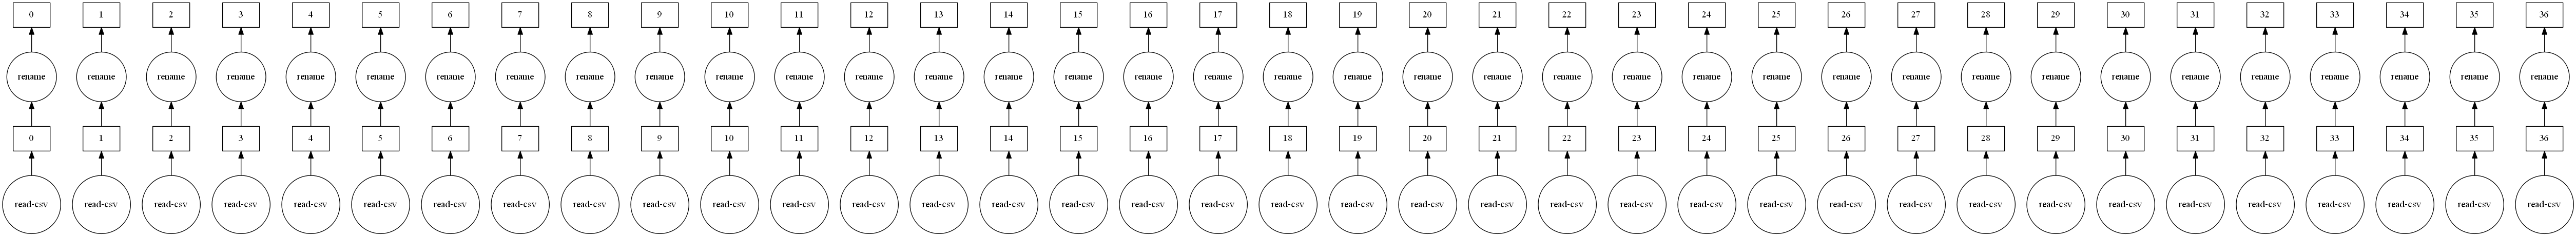

In [7]:
ddf_GFS25.visualize () 

In [8]:
with ProgressBar():
    ddf_GFS25.replace({-999.0, np.nan}).compute()

[########################################] | 100% Completed |  6min 18.5s


In [9]:
ddf_GFS25.head(2)

Data Estação  Latitude  Longitude  Vento_zonal  Vento_meridional  \
0  2103010000    SAAR   -32.905    -60.782       -3.125             1.046   
1  2103010300    SAAR   -32.905    -60.782       -3.524             0.420   

   Temperatura      Td  Pressão_reduzida  Precipitação_6hr  \
0       28.467  13.641          1010.135            -999.0   
1       25.948  10.629          1010.831            -999.0   

   Rad_onda_curta_incidente    Rlong        H       Le     Tmin     Tmax  \
0                    -999.0 -999.000 -999.000 -999.000 -999.000 -999.000   
1                       0.0  379.896  -36.969    0.758   25.955   28.472   

     Neb  Tmintmax  
0 -999.0    -999.0  
1    0.0    -999.0

In [10]:
with ProgressBar():    
    print(ddf_GFS25.isna().sum().compute())

[########################################] | 100% Completed |  5min 32.7s
Data                        0
Estação                     0
Latitude                    0
Longitude                   0
Vento_zonal                 0
Vento_meridional            0
Temperatura                 0
Td                          0
Pressão_reduzida            0
Precipitação_6hr            0
Rad_onda_curta_incidente    0
Rlong                       0
H                           0
Le                          0
Tmin                        0
Tmax                        0
Neb                         0
Tmintmax                    0
dtype: int64


In [11]:
#Define a data como index
with ProgressBar():
    ddf_GFS25 = ddf_GFS25.set_index('Data') 

[########################################] | 100% Completed |  7min 25.3s


In [12]:
ddf_GFS25=ddf_GFS25.assign (Modelo='GFS25')

In [50]:
ddf_GFS25.head(2)

Estação  Latitude  Longitude  Vento_zonal  Vento_meridional  \
Data                                                                     
2103010000    SAAR   -32.905    -60.782       -3.125             1.046   
2103010000   84008    -0.900    -89.620       -0.504             2.076   

            Temperatura      Td  Pressão_reduzida  Precipitação_6hr  \
Data                                                                  
2103010000       28.467  13.641          1010.135            -999.0   
2103010000       26.805  22.394          1006.807            -999.0   

            Rad_onda_curta_incidente  Rlong      H     Le   Tmin   Tmax  \
Data                                                                      
2103010000                    -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   
2103010000                    -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   

              Neb  Tmintmax Modelo  
Data                                
2103010000 -999.0    -999.0  GFS25  
2103010000 -999.0    -999.0  GFS25

In [ ]:
ddf_GFS25.visualize ()

In [15]:
ddf_GFS25.divisions

(2103010000,
 2103032100,
 2103051200,
 2103060900,
 2103070600,
 2103080300,
 2103090000,
 2103091200,
 2103100600,
 2103101800,
 2103110600,
 2103120000,
 2103121200,
 2103130000,
 2103131500,
 2103140300,
 2103141500,
 2103150600,
 2103151500,
 2103160600,
 2103161800,
 2103170600,
 2103171800,
 2103180300,
 2103181800,
 2103190600,
 2103191500,
 2103200900,
 2103201800,
 2103211200,
 2103220900,
 2103221500,
 2103231500,
 2103241200,
 2103250300,
 2103262100,
 2103281200,
 2104040000)

# Importação do Conjunto de Dados: WRF

In [16]:
ddf_WRF = dd.read_csv('Outros' + '/WRF*.txt', sep='\s+', skiprows=range(9), header=None, engine='python', dtype={0: 'int', 1: 'object',2:'float', 3: 'float', 4:'float', 5:'float', 6: 'float', 7:'float', 8: 'float', 9: 'float', 10: 'float', 11: 'float', 12: 'float', 13: 'float', 14: 'float',15 : 'float'})

In [17]:
new_columns = ['Data', 'Estação','Latitude','Longitude','Vento_zonal','Vento_meridional','Temperatura','Td','Pressão_reduzida','Precipitação_6hr', 'Rad_onda_curta_incidente','CAPE','Rlong','H','Le','Tmintmax']
ddf_WRF = ddf_WRF.rename(columns=dict(zip(ddf_WRF.columns, new_columns)))

In [18]:
ddf_WRF

Dask DataFrame Structure:
                 Data Estação Latitude Longitude Vento_zonal Vento_meridional Temperatura       Td Pressão_reduzida Precipitação_6hr Rad_onda_curta_incidente     CAPE    Rlong        H       Le Tmintmax
npartitions=16                                                                                                                                                                                            
                int32  object  float64   float64     float64          float64     float64  float64          float64          float64                  float64  float64  float64  float64  float64  float64
                  ...     ...      ...       ...         ...              ...         ...      ...              ...              ...                      ...      ...      ...      ...      ...      ...
...               ...     ...      ...       ...         ...              ...         ...      ...              ...              ...                      ...      ...      ...      ...      ...      ...
                  ...     ...      ...       ...         ...              ...         ...      ...              ...              ...                      ...      ...      ...      ...      ...      ...
                  ...     ...      ...       ...         ...              ...         ...      ...              ...              ...                      ...      ...      ...      ...      ...      ...
Dask Name: rename, 32 tasks

In [19]:
ddf_WRF.head (2)

Data Estação  Latitude  Longitude  Vento_zonal  Vento_meridional  \
0  2103010000    SAAR   -32.905    -60.782       -3.336             0.780   
1  2103010100    SAAR   -32.905    -60.782       -3.659             0.509   

   Temperatura      Td  Pressão_reduzida  Precipitação_6hr  \
0       28.845  13.693          1010.963            -999.0   
1       24.701  14.416          1011.875            -999.0   

   Rad_onda_curta_incidente    CAPE    Rlong        H      Le  Tmintmax  
0                    -999.0  11.888 -999.000 -999.000 -999.00    -999.0  
1                       0.0   0.000  378.674  -21.042    1.67    -999.0

In [20]:
ddf_WRF.tail (2)

Data Estação  Latitude  Longitude  Vento_zonal  \
104461  2103212300   71650    -51.51     -26.79       17.598   
104462  2103220000   71650    -51.51     -26.79       17.024   

        Vento_meridional  Temperatura     Td  Pressão_reduzida  \
104461            -3.191        3.239  0.618           984.236   
104462            -2.514        3.117  0.428           984.348   

        Precipitação_6hr  Rad_onda_curta_incidente  CAPE    Rlong       H  \
104461             0.076                       0.0  45.0  236.851  54.872   
104462             0.065                       0.0  44.0  234.142  56.365   

             Le  Tmintmax  
104461  114.909  -999.000  
104462  115.975     7.267

In [21]:
#Checa o número de valores faltantes (NA,NaN,-999.00) em cada coluna

In [22]:
with ProgressBar():
    ddf_WRF.replace({'-999.0', np.nan}).compute()

[########################################] | 100% Completed |  1min 48.8s


In [23]:
ddf_WRF.head(2)

Data Estação  Latitude  Longitude  Vento_zonal  Vento_meridional  \
0  2103010000    SAAR   -32.905    -60.782       -3.336             0.780   
1  2103010100    SAAR   -32.905    -60.782       -3.659             0.509   

   Temperatura      Td  Pressão_reduzida  Precipitação_6hr  \
0       28.845  13.693          1010.963            -999.0   
1       24.701  14.416          1011.875            -999.0   

   Rad_onda_curta_incidente    CAPE    Rlong        H      Le  Tmintmax  
0                    -999.0  11.888 -999.000 -999.000 -999.00    -999.0  
1                       0.0   0.000  378.674  -21.042    1.67    -999.0

In [24]:
with ProgressBar():
    print(ddf_WRF.isna().sum().compute())

[########################################] | 100% Completed |  1min 40.7s
Data                        0
Estação                     0
Latitude                    0
Longitude                   0
Vento_zonal                 0
Vento_meridional            0
Temperatura                 0
Td                          0
Pressão_reduzida            0
Precipitação_6hr            0
Rad_onda_curta_incidente    0
CAPE                        0
Rlong                       0
H                           0
Le                          0
Tmintmax                    0
dtype: int64


In [25]:
#Define a data como index
with ProgressBar():
    ddf_WRF = ddf_WRF.set_index('Data') 

[########################################] | 100% Completed |  1min 38.2s


In [26]:
ddf_WRF=ddf_WRF.assign (Modelo='WRF')

In [27]:
ddf_WRF

Dask DataFrame Structure:
               Estação Latitude Longitude Vento_zonal Vento_meridional Temperatura       Td Pressão_reduzida Precipitação_6hr Rad_onda_curta_incidente     CAPE    Rlong        H       Le Tmintmax  Modelo
npartitions=16                                                                                                                                                                                             
2103010000      object  float64   float64     float64          float64     float64  float64          float64          float64                  float64  float64  float64  float64  float64  float64  object
2103021800         ...      ...       ...         ...              ...         ...      ...              ...              ...                      ...      ...      ...      ...      ...      ...     ...
...                ...      ...       ...         ...              ...         ...      ...              ...              ...                      ...      ...      ...      ...      ...      ...     ...
2103191100         ...      ...       ...         ...              ...         ...      ...              ...              ...                      ...      ...      ...      ...      ...      ...     ...
2103220000         ...      ...       ...         ...              ...         ...      ...              ...              ...                      ...      ...      ...      ...      ...      ...     ...
Dask Name: assign, 195 tasks

In [28]:
ddf_WRF.divisions

(2103010000,
 2103021800,
 2103032300,
 2103050700,
 2103061300,
 2103072100,
 2103082000,
 2103100000,
 2103102300,
 2103112100,
 2103122000,
 2103140000,
 2103142300,
 2103152100,
 2103171100,
 2103191100,
 2103220000)

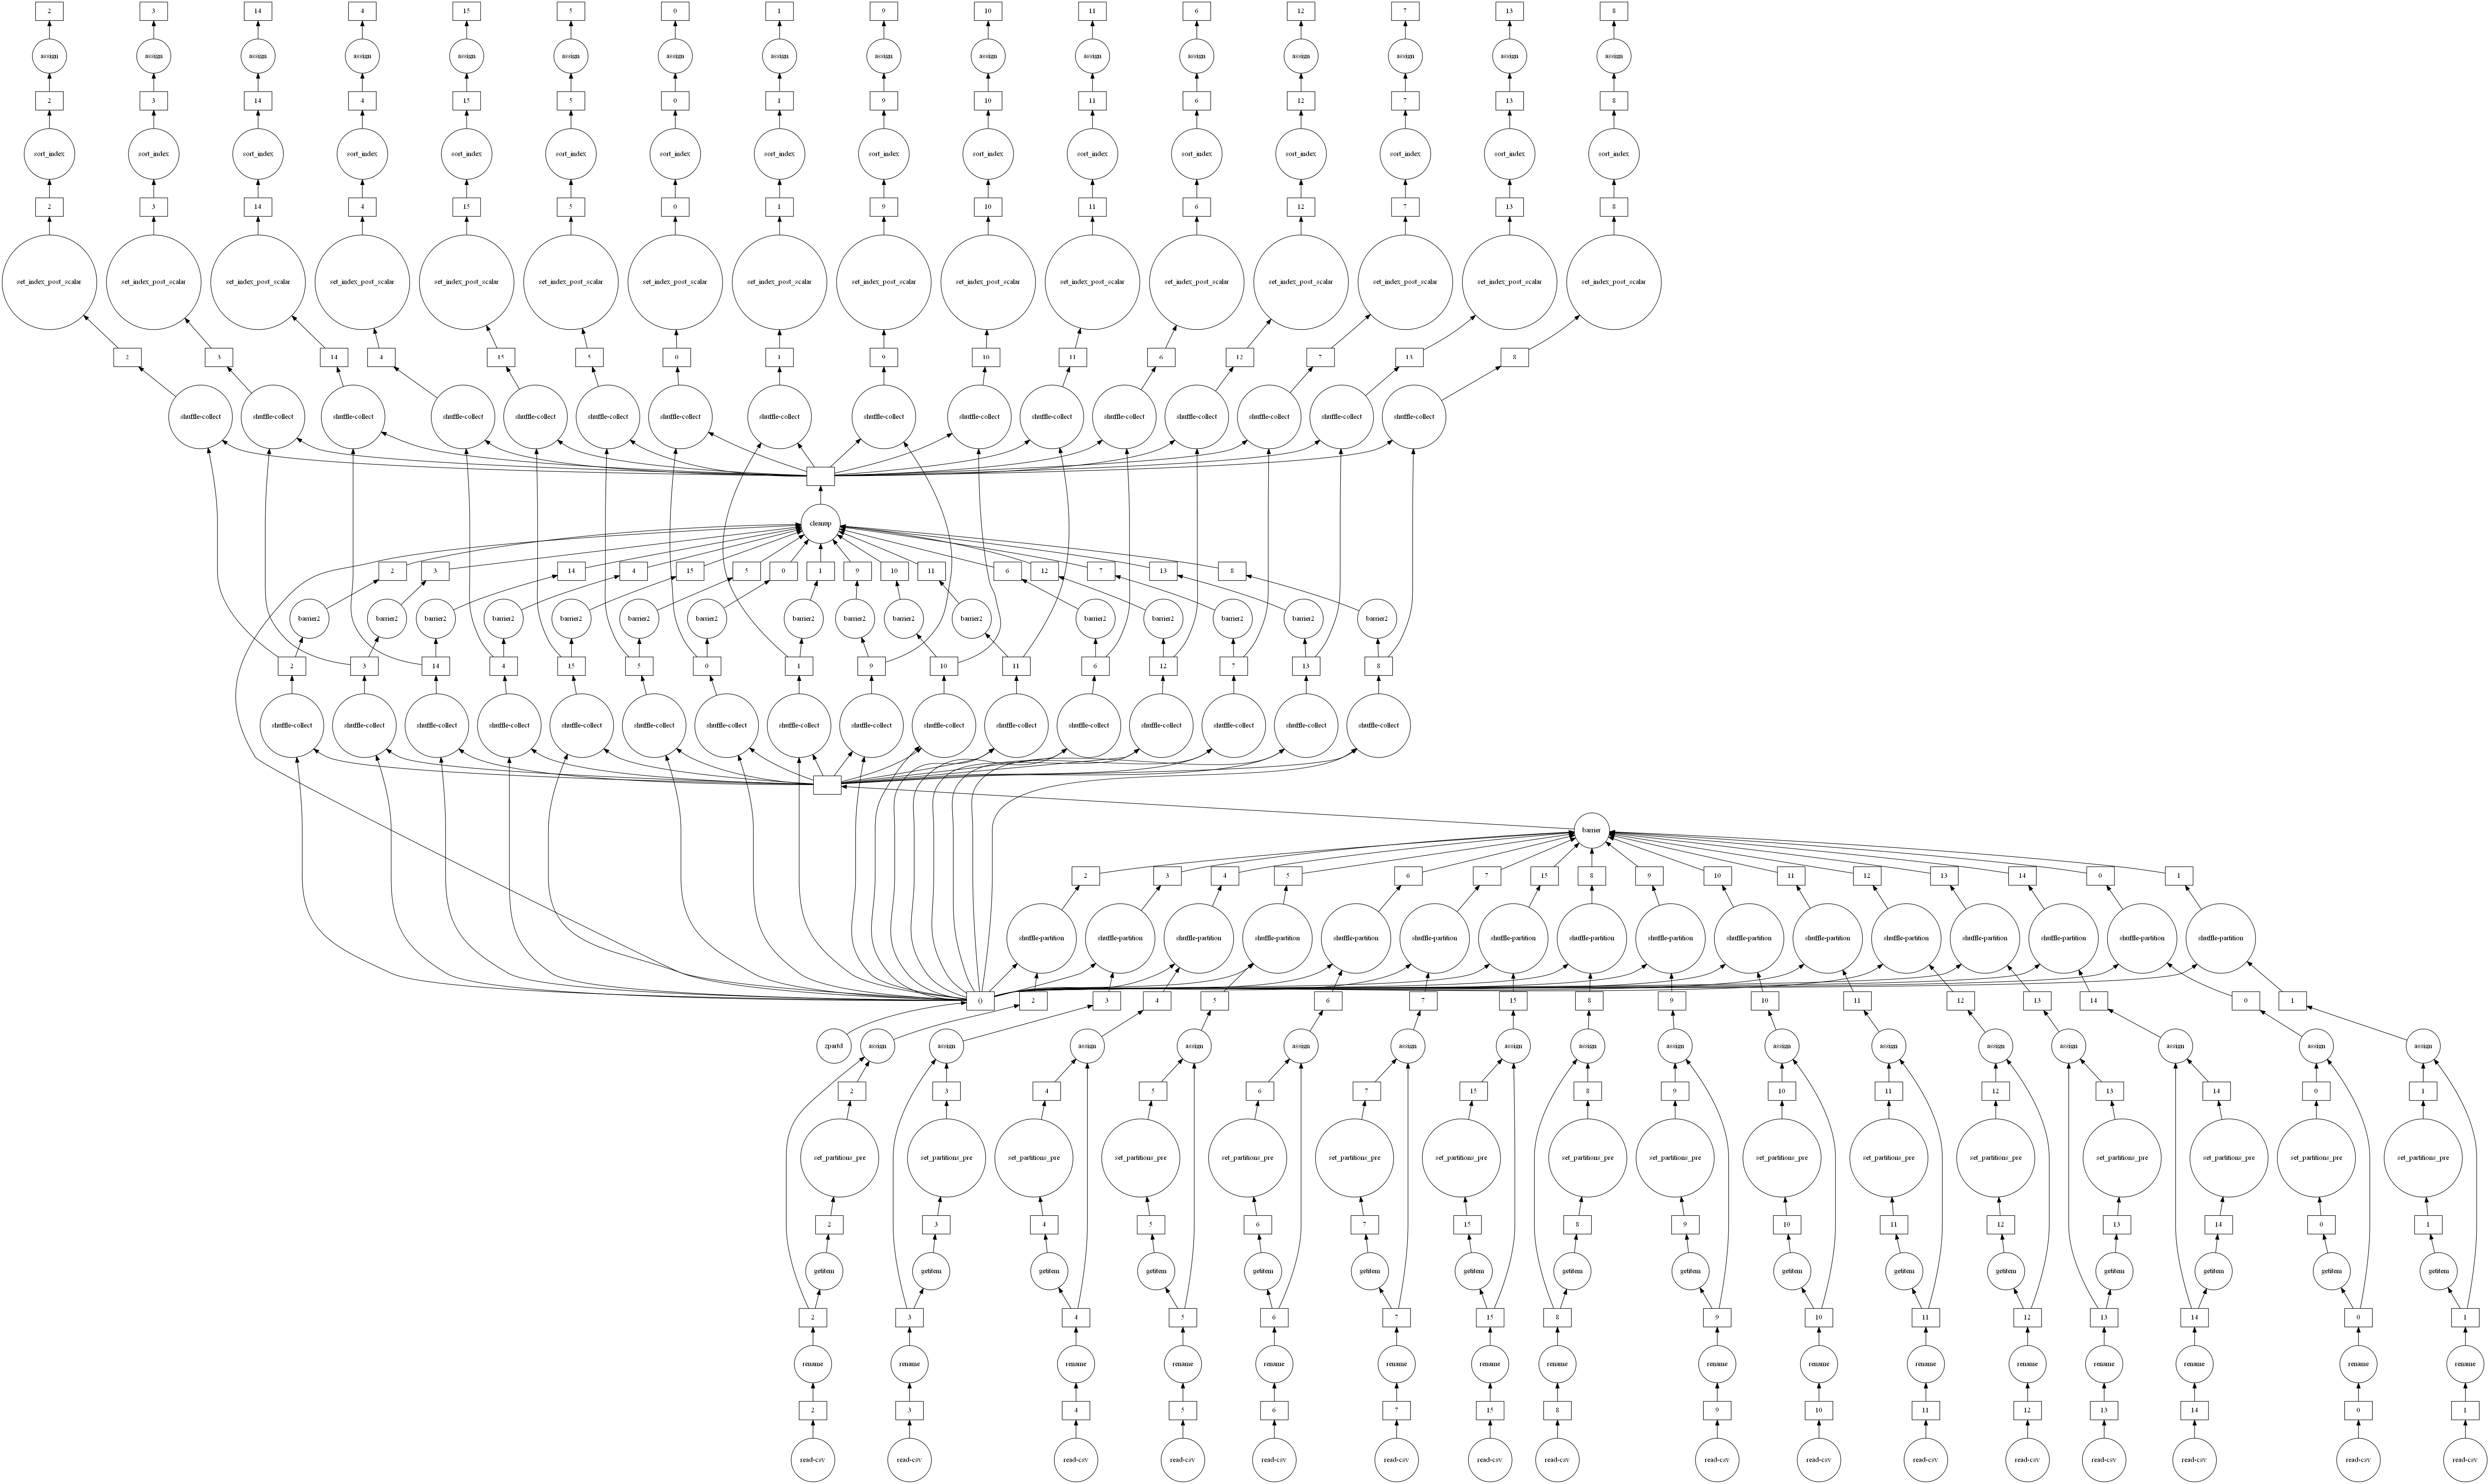

In [29]:
ddf_WRF.visualize () 

# Importação do Conjunto de Dados: COSMO

In [2]:
ddf_COSMO = dd.read_csv('Outros' + '/COSMO*.txt', sep='\s+', skiprows=range(9), header=None, engine='python', dtype={0: 'int', 1: 'object',2:'float', 3: 'float', 4:'float', 5:'float', 6: 'float', 7:'float', 8: 'float', 9: 'float', 10: 'float'})

In [3]:
new_columns = ['Data', 'Estação','Latitude','Longitude','Vento_zonal','Vento_meridional','Temperatura','Td','Pressão_reduzida','Precipitação_6hr','Tmintmax']
ddf_COSMO = ddf_COSMO.rename(columns=dict(zip(ddf_COSMO.columns, new_columns)))

In [32]:
ddf_COSMO

Dask DataFrame Structure:
                 Data Estação Latitude Longitude Vento_zonal Vento_meridional Temperatura       Td Pressão_reduzida Precipitação_6hr Tmintmax
npartitions=76                                                                                                                               
                int32  object  float64   float64     float64          float64     float64  float64          float64          float64  float64
                  ...     ...      ...       ...         ...              ...         ...      ...              ...              ...      ...
...               ...     ...      ...       ...         ...              ...         ...      ...              ...              ...      ...
                  ...     ...      ...       ...         ...              ...         ...      ...              ...              ...      ...
                  ...     ...      ...       ...         ...              ...         ...      ...              ...              ...      ...
Dask Name: rename, 152 tasks

In [33]:
ddf_COSMO.head (2)

Data Estação  Latitude  Longitude  Vento_zonal  Vento_meridional  \
0  2103010000    SAAR   -32.905    -60.782       -2.264            -0.235   
1  2103010100    SAAR   -32.905    -60.782       -2.713            -0.694   

   Temperatura      Td  Pressão_reduzida  Precipitação_6hr  Tmintmax  
0       27.790  17.564          1011.180            -999.0    -999.0  
1       28.701  16.260          1011.537            -999.0    -999.0

In [34]:
ddf_COSMO.tail (2)

Data Estação  Latitude  Longitude  Vento_zonal  Vento_meridional  \
10223  2103192300   31915     -21.3     -40.96       -4.032            -2.063   
10224  2103200000   31915     -21.3     -40.96       -3.748            -2.390   

       Temperatura      Td  Pressão_reduzida  Precipitação_6hr  Tmintmax  
10223       25.718  23.068          1014.244               0.0  -999.000  
10224       25.570  23.231          1014.815               0.0    26.669

In [35]:
#Check number of missing values for each column
with ProgressBar():
    print(ddf_COSMO.isna().sum().compute())

[########################################] | 100% Completed |  2min  4.3s
Data                0
Estação             0
Latitude            0
Longitude           0
Vento_zonal         0
Vento_meridional    0
Temperatura         0
Td                  0
Pressão_reduzida    0
Precipitação_6hr    0
Tmintmax            0
dtype: int64


In [4]:
#Define a data como index
with ProgressBar():
    ddf_COSMO = ddf_COSMO.set_index('Data') 

[########################################] | 100% Completed |  1min 58.5s


In [5]:
ddf_COSMO=ddf_COSMO.assign (Modelo='COSMO')

In [6]:
ddf_COSMO.visualize ()

In [39]:
ddf_COSMO.divisions

(2103010000,
 2103011100,
 2103020000,
 2103020700,
 2103021600,
 2103030100,
 2103030500,
 2103031100,
 2103031800,
 2103040100,
 2103040600,
 2103041200,
 2103041800,
 2103050100,
 2103050500,
 2103051100,
 2103051800,
 2103060000,
 2103060600,
 2103061100,
 2103061900,
 2103070000,
 2103070600,
 2103071100,
 2103071900,
 2103080100,
 2103080600,
 2103081200,
 2103081900,
 2103090100,
 2103090600,
 2103091000,
 2103091800,
 2103100100,
 2103100500,
 2103101000,
 2103101900,
 2103110000,
 2103110600,
 2103111200,
 2103111900,
 2103120000,
 2103120500,
 2103121100,
 2103121800,
 2103129497,
 2103130400,
 2103130900,
 2103131800,
 2103140100,
 2103140500,
 2103141100,
 2103141800,
 2103150000,
 2103150500,
 2103151100,
 2103151900,
 2103160000,
 2103160500,
 2103161200,
 2103161900,
 2103170000,
 2103170500,
 2103171100,
 2103171900,
 2103180000,
 2103180500,
 2103181000,
 2103181900,
 2103190100,
 2103190500,
 2103191100,
 2103191900,
 2103200000,
 2103201200,
 2103210000,
 2103220000)

# Junção dos dados

In [40]:
#Junção dos dados do modelo GFS25 com os do modelo WRF
with ProgressBar():
    Joined_1 = ddf_GFS25.merge(ddf_WRF, how = 'outer') 
    print(Joined_1)

Dask DataFrame Structure:
               Estação Latitude Longitude Vento_zonal Vento_meridional Temperatura       Td Pressão_reduzida Precipitação_6hr Rad_onda_curta_incidente    Rlong        H       Le     Tmin     Tmax      Neb Tmintmax  Modelo     CAPE
npartitions=37                                                                                                                                                                                                                        
                object  float64   float64     float64          float64     float64  float64          float64          float64                  float64  float64  float64  float64  float64  float64  float64  float64  object  float64
                   ...      ...       ...         ...              ...         ...      ...              ...              ...                      ...      ...      ...      ...      ...      ...      ...      ...     ...      ...
...                ...      ...       ...         

In [41]:
#Junção dos dados do modelo GFS25 com os do modelo WRF
with ProgressBar():
    Joined_2 = Joined_1.merge(ddf_COSMO, how = 'outer')
    print(Joined_2)

Dask DataFrame Structure:
               Estação Latitude Longitude Vento_zonal Vento_meridional Temperatura       Td Pressão_reduzida Precipitação_6hr Rad_onda_curta_incidente    Rlong        H       Le     Tmin     Tmax      Neb Tmintmax  Modelo     CAPE
npartitions=76                                                                                                                                                                                                                        
                object  float64   float64     float64          float64     float64  float64          float64          float64                  float64  float64  float64  float64  float64  float64  float64  float64  object  float64
                   ...      ...       ...         ...              ...         ...      ...              ...              ...                      ...      ...      ...      ...      ...      ...      ...      ...     ...      ...
...                ...      ...       ...         

In [42]:
with ProgressBar():
    Joined_2_agg = Joined_2.groupby(['Latitude', 'Longitude']).agg({'Modelo':'count'})
    print(Joined_2_agg)

Dask DataFrame Structure:
              Modelo
npartitions=1       
               int64
                 ...
Dask Name: aggregate-agg, 3339 tasks


# Para a análise de métricas estatísticas 

In [43]:
# Índice de concordância de Willmott (1981) parte da hipótese de que toda a variância de erros está contida na previsão e que a observação é livre de erros

In [45]:
with ProgressBar():
    Joined_3 = Joined_2.groupby(['Latitude', 'Longitude'])#Groupby
   
    Seleção_1= Joined_3[['Modelo','Vento_zonal','Vento_meridional']] #Seleção
    

# Para a análise de parametrizações físicas 

In [ ]:
# Avaliação do papel da radiação sobre o efeito estufa

In [47]:
with ProgressBar():
    Joined_4 = Joined_2.groupby(['Latitude', 'Longitude'])#Groupby
    print(Joined_4)

In [48]:
Joined_4[['Modelo','Rad_onda_curta_incidente','Rlong']] #Seleção

# Para análises termodinâmicas

In [ ]:
# Avaliação sobre o efeito do nevoeiro (temperatura do ar e temperatura do ponto de orvalho -td(oC),
#pressão em superfície (hPa), velocidade do vento a 2 m de altura (m.s-1), altura da estação (m),
#nebulosidade)

In [49]:
with ProgressBar():
    Joined_5 = Joined_2.groupby(['Latitude', 'Longitude'])#Groupby
    Joined_5[['Modelo','Temperatura','Td', 'Neb', 'H']] #Seleção